# 你將會學到使用Keras去研發以及評估多類別的神經網路
- 如何用神經網路，整理多重類別數據的分類
- 如何使用__scikit-learn__去評估__Keras__神經網路模型

## Iris Flowers / 鳶尾花 類別 [數據集](http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

1. __Sepal length__ / 花萼長 單位公分. 
2. __Sepal width__ / 花萼寬 單位公分. 
3. __Petal length__ / 花瓣長 單位公分. 
4. __Petal width__ / 花瓣寬 單位公分.  
5. 類別

In [1]:
import numpy as np
import seaborn as sns
%matplotlib notebook
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

/Users/Joel/anaconda/envs/py3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 9487
np.random.seed(seed)

## 展望數據

In [3]:
df = read_csv("dataset/iris.data.txt", header=None, 
              names=['Sepal length','Sepal width','Petal length','Petal width','Class'])
df.dtypes

Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class            object
dtype: object

<IPython.core.display.Javascript object>


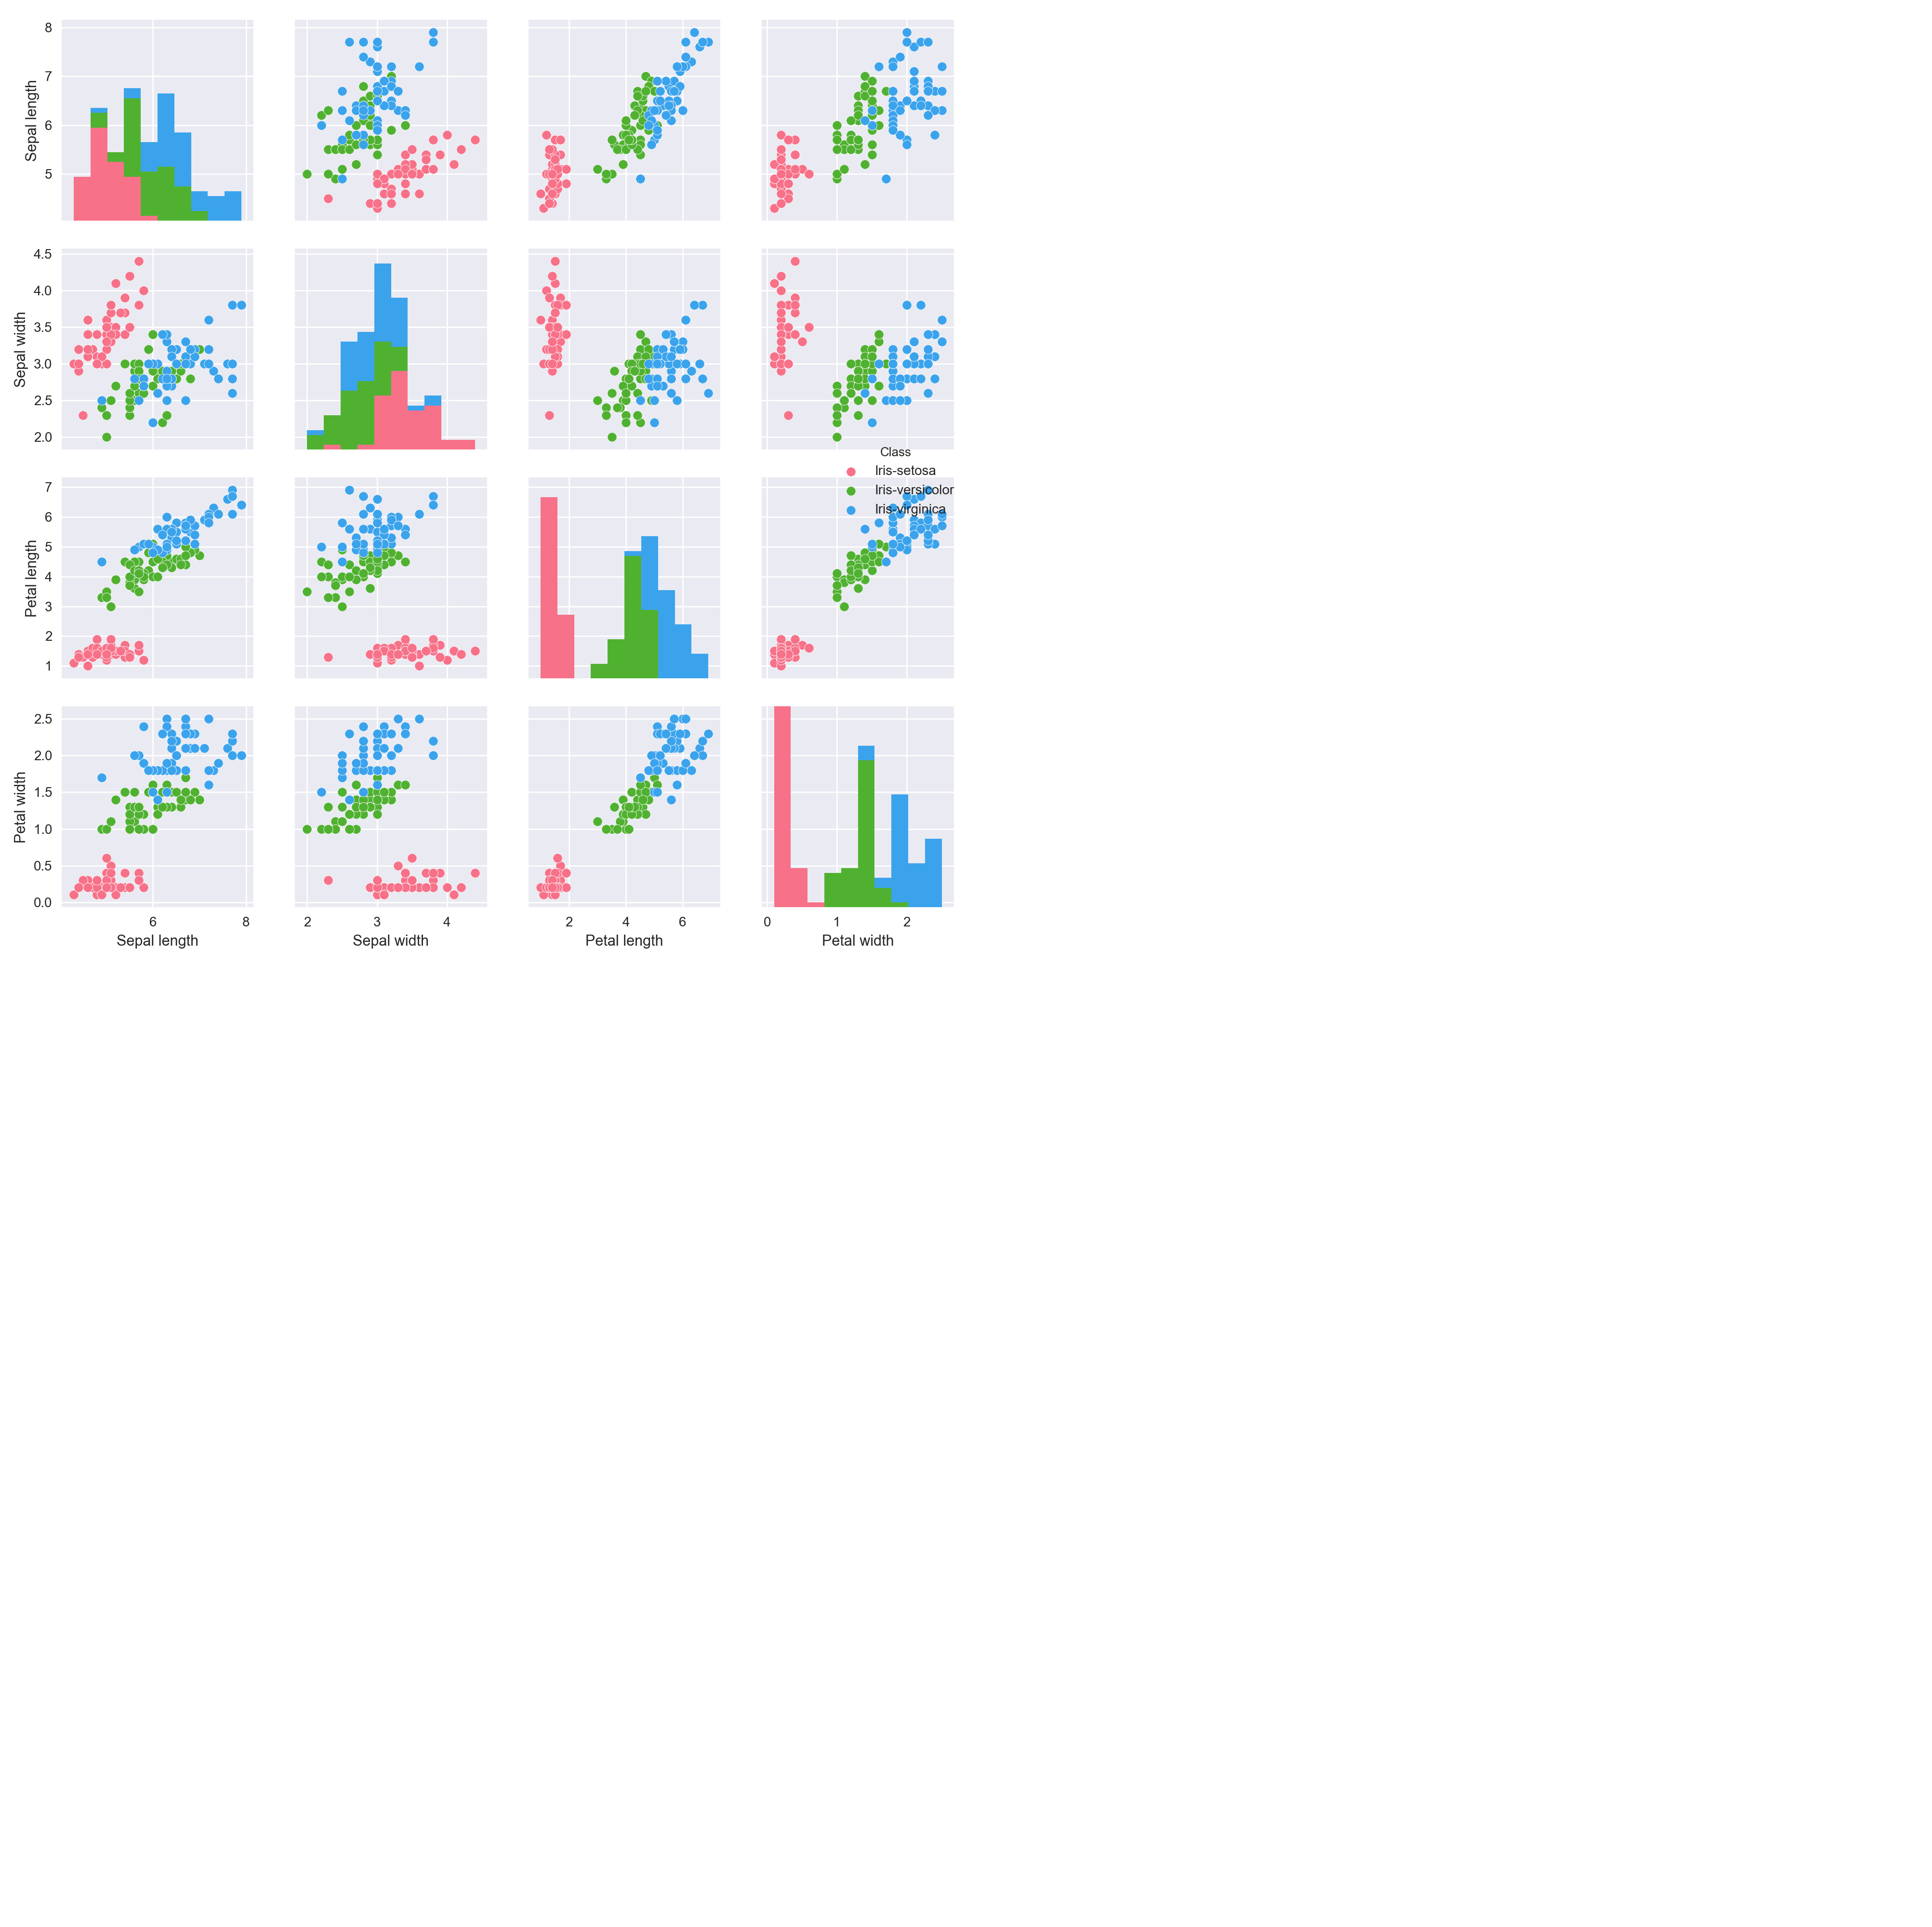

In [4]:
sns.pairplot(df, hue='Class', palette='husl');

In [5]:
df.iloc[:,4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 數據切割 訓練 / 測試 Data Split

In [6]:
iris = df.values

X = iris[:,0:4]
Y = iris[:,4]

## 輸出變數進行編碼

 scikit-learn class LabelEncoder using the Keras function to categorical().

In [8]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#### Categorical Encoding [Doc](https://keras.io/losses/)
Note: when using the categorical_crossentropy loss, 
your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros expect for a 1 at the index corresponding to the class of the sample). 
In order to convert integer targets into categorical targets, you can use the Keras __utility to_categorical__

```
from keras.utils.np_utils import to_categorical

categorical_labels = to_categorical(int_labels, num_classes=None)
```

## 建模
- 初始權重使用常態變數 kernel_initializer= 'normal'
- 損失函數使用 loss= 'categorical_crossentropy'

In [9]:
# define baseline model
def baseline_model():
  # create model
    model = Sequential()
    model.add(Dense(6, input_dim=4, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(3, kernel_initializer= 'normal' , activation= 'sigmoid' ))
  # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

## 使用k折交互驗證去評估模型

In [10]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 96.67% (2.11%)
